### Problem Statement:
A digital media company (similar to Voot, Hotstar, Netflix, etc.) had launched a show. Initially, the show got a good response, but then witnessed a decline in viewership. The company wants to figure out what went wrong.


### Approach:
We are concerned about determining the driver variable for show viewership. This is the case of prediction rather than projection where we are more interested in predicting the key driver variables and their impact rather than forcasting the results.

First we will list down the potential reasons for the decline in viewershp.<br>

The potential reasons could be:
1. Decline in the number of people coming to the platform
2. Fewer people watching the video
3. A Decrease in marketing spend?
4. Competitive shows, e.g. cricket/ IPL
5. Special holidays
6. Twist in the story


### Data
We have been given data for the period of 1 March 2017 to 19 May 2017.<br>
With Columns as<br> 
Views_show         : Number of times the show was viewed<br>
Visitors           : Number of visitors who browsed the platform, but not necessarily watched a video.<br>
Views_platform	   : Number of times a video was viewed on the platform<br>
Ad_impression	   : Proxy for marketing budget. Represents number of impressions generated by ads<br>
Cricket_match_india: If a cricket match was being played. 1 indicates match on a given day, 0 indicates there wasn't<br>
Character_A        : Describes presence of Character A. 1 indicates character A was in the episode, 0 indicates she/he wasn't

In [112]:
import warnings
warnings.filterwarnings("ignore")

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1: Reading and Understanding the Data


In [114]:
media = pd.read_csv('mediacompany.csv')
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


In [115]:
media.shape

(80, 8)

In [116]:
media.describe()

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
count,80.000000,8.000000e+01,8.000000e+01,8.000000e+01,80.000000,80.000000,0.0
mean,289902.625000,1.699066e+06,2.222401e+06,1.442374e+09,0.100000,0.375000,NaN
std,154924.323585,2.311571e+05,2.913510e+05,2.983186e+08,0.301893,0.487177,NaN
min,102520.000000,1.248183e+06,1.690727e+06,1.010868e+09,0.000000,0.000000,NaN
25%,185353.250000,1.550766e+06,2.010816e+06,1.207911e+09,0.000000,0.000000,NaN
50%,235807.000000,1.698843e+06,2.226270e+06,1.385931e+09,0.000000,0.000000,NaN
75%,350079.000000,1.817895e+06,2.388837e+06,1.632416e+09,0.000000,1.000000,NaN
max,758631.000000,2.344650e+06,3.064422e+06,2.424203e+09,1.000000,1.000000,NaN


In [117]:
# drop the last column

media = media.iloc[:, 0:7]

In [118]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [119]:
media.shape

(80, 7)

In [120]:
media.describe()

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
count,80.000000,8.000000e+01,8.000000e+01,8.000000e+01,80.000000,80.000000
mean,289902.625000,1.699066e+06,2.222401e+06,1.442374e+09,0.100000,0.375000
std,154924.323585,2.311571e+05,2.913510e+05,2.983186e+08,0.301893,0.487177
min,102520.000000,1.248183e+06,1.690727e+06,1.010868e+09,0.000000,0.000000
25%,185353.250000,1.550766e+06,2.010816e+06,1.207911e+09,0.000000,0.000000
50%,235807.000000,1.698843e+06,2.226270e+06,1.385931e+09,0.000000,0.000000
75%,350079.000000,1.817895e+06,2.388837e+06,1.632416e+09,0.000000,1.000000
max,758631.000000,2.344650e+06,3.064422e+06,2.424203e+09,1.000000,1.000000


In [121]:
# Checking Null values
media.isnull().sum()*100/media.shape[0]
# There are no NULL values in the dataset, hence it is clean.

Date                   0.0
Views_show             0.0
Visitors               0.0
Views_platform         0.0
Ad_impression          0.0
Cricket_match_india    0.0
Character_A            0.0
dtype: float64

In [122]:
# Converting date to Pandas datetime format

media['Date'] = pd.to_datetime(media['Date'])

media.tail()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
75,2017-05-15,313945,1808684,2226788,1398052759,1,0
76,2017-05-16,185689,1814227,2199844,1311961223,1,0
77,2017-05-17,142260,1755803,2225752,1248266254,1,0
78,2017-05-18,135871,1749654,2302789,1284859759,1,0
79,2017-05-19,108961,1746735,2279036,1246026846,1,0


In [123]:
# Let's extract the year, month, day and weekday

media['year'] = media['Date'].dt.year
media['month'] = media['Date'].dt.month
media['day'] = media['Date'].dt.day
media['weekday'] = media['Date'].dt.day_name()
media = media.drop('Date', axis=1)
media.head()

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,year,month,day,weekday
0,183738,1260228,1706478,1060860448,0,0,2017,3,1,Wednesday
1,193763,1270561,1690727,1031846645,0,0,2017,3,2,Thursday
2,210479,1248183,1726157,1010867575,0,0,2017,3,3,Friday
3,240061,1492913,1855353,1079194579,1,0,2017,3,4,Saturday
4,446314,1594712,2041418,1357736987,0,0,2017,3,5,Sunday


In [124]:
# Drop year as it is constant
media = media.drop('year', axis=1)


In [125]:
media.head()

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,month,day,weekday
0,183738,1260228,1706478,1060860448,0,0,3,1,Wednesday
1,193763,1270561,1690727,1031846645,0,0,3,2,Thursday
2,210479,1248183,1726157,1010867575,0,0,3,3,Friday
3,240061,1492913,1855353,1079194579,1,0,3,4,Saturday
4,446314,1594712,2041418,1357736987,0,0,3,5,Sunday


### Step 2: Visualizing the data

In [126]:
# Seperate Categorical and Continuous Variables

num_vars = media[['Views_show', 'Visitors', 'Views_platform', 'Ad_impression']]
cat_vars = media[['weekday', 'month', 'day', 'Cricket_match_india', 'Character_A']]

<Figure size 1000x1000 with 0 Axes>

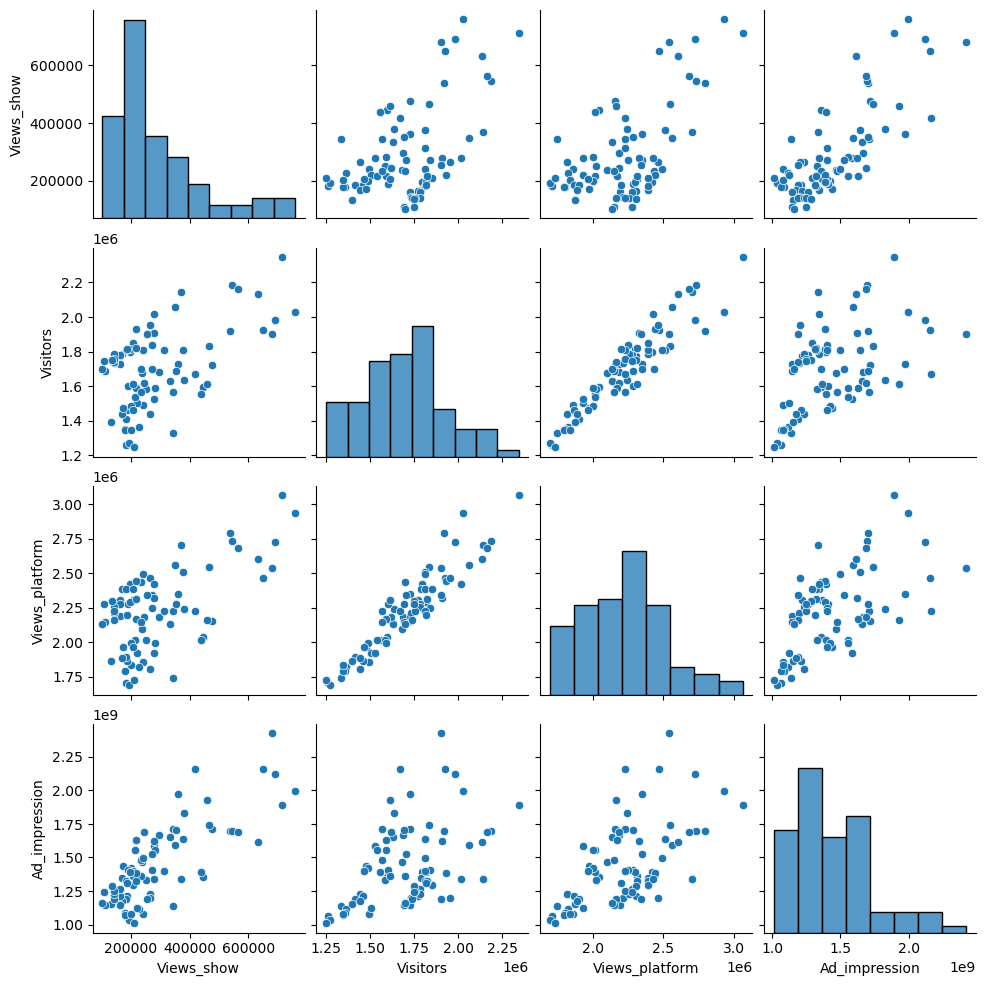

In [127]:
# Visualize the numerical variables


plt.figure(figsize=(10, 10))
sns.pairplot(num_vars)
plt.show()

Observation:
- All 3 variables show high correlation with View_shows

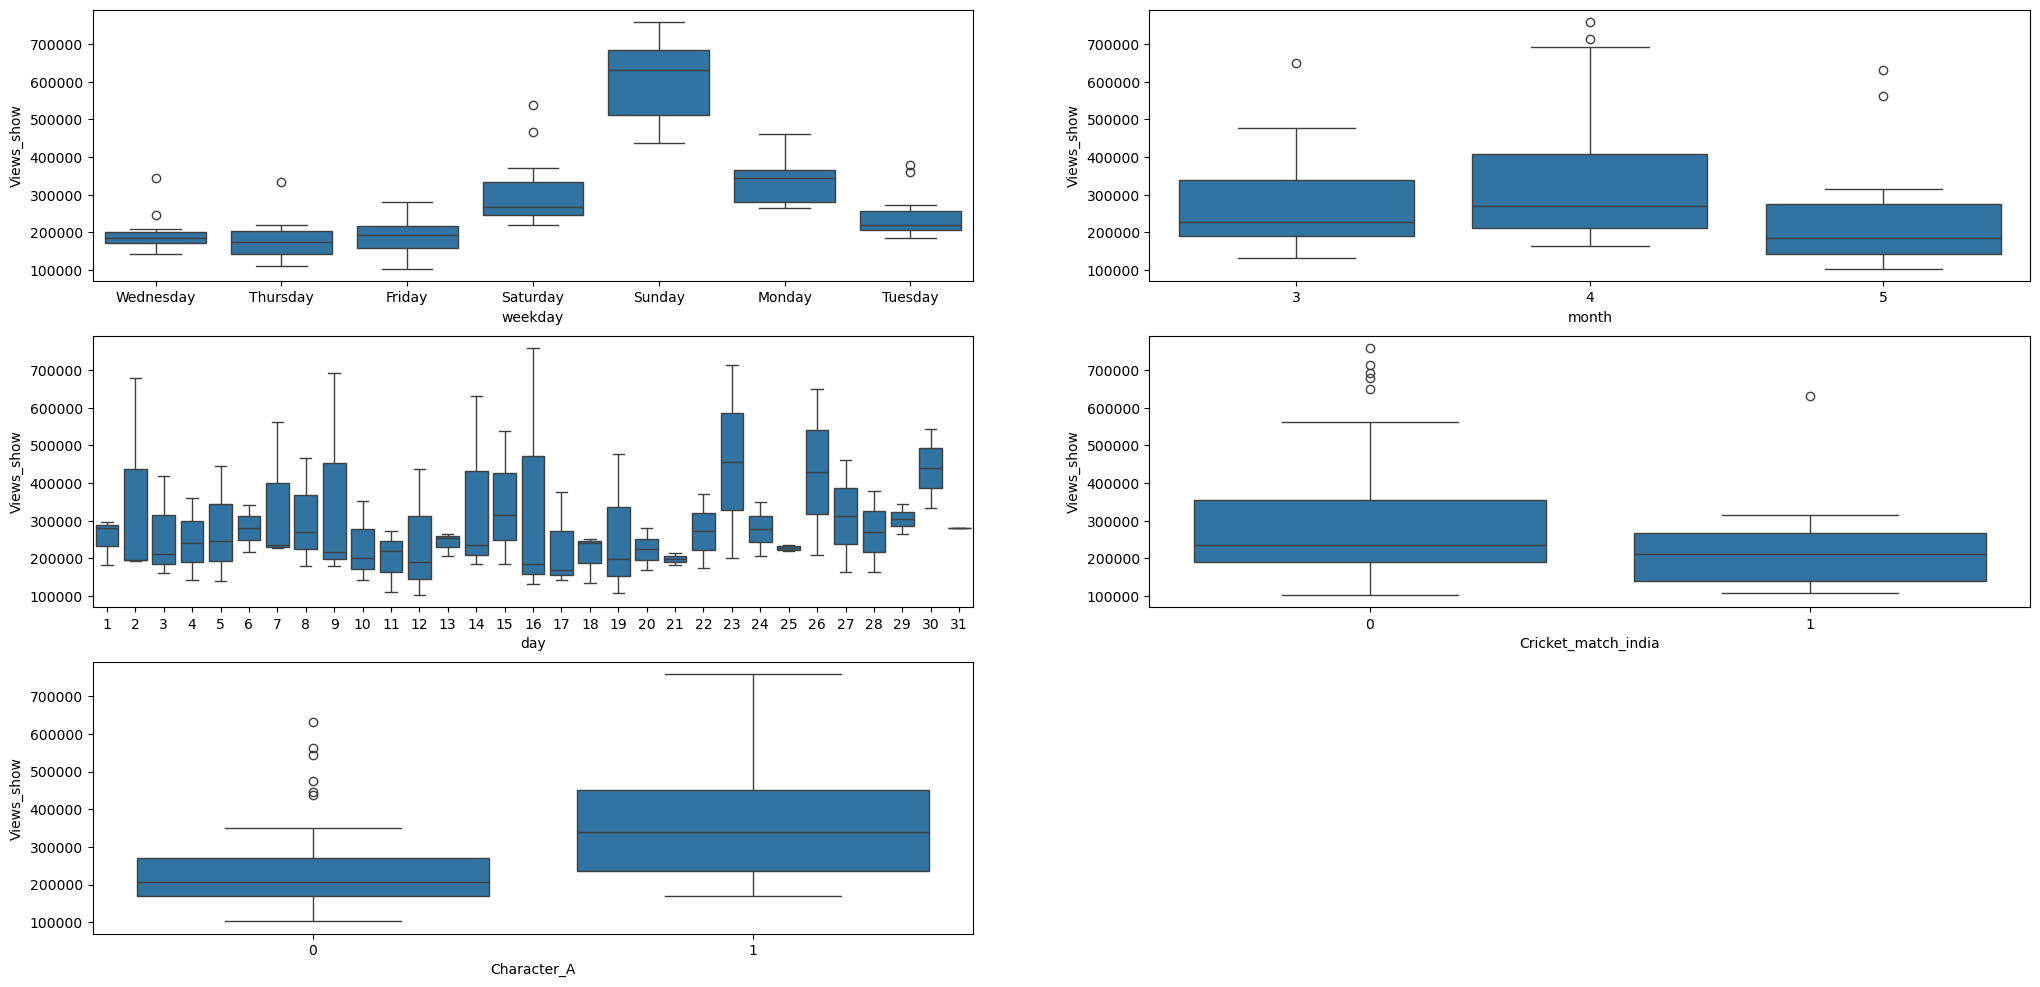

In [128]:
# Visualize the categorical variables

plt.figure(figsize=(25, 12))

for i, var in enumerate(cat_vars):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=var, y='Views_show', data=media)
plt.show()

Observations: 
- Weekday: High viewership on Sunday
- Month: Shows seen for 3 months, Highest in April
- Day: Very random distribution. We don't really need this, we can drop it
- Cricket Match: When there is a match, viewership decreased significantly
- Char_A: Whenever Char_A shows up, there is an increase in viewership

### Step 3: Preparing the data
    - Converting categorical variables to numerical
        - Converting yes/no to 1/0
        - Converting other categorical variables to dummy variables

In [129]:
media.head()

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,month,day,weekday
0,183738,1260228,1706478,1060860448,0,0,3,1,Wednesday
1,193763,1270561,1690727,1031846645,0,0,3,2,Thursday
2,210479,1248183,1726157,1010867575,0,0,3,3,Friday
3,240061,1492913,1855353,1079194579,1,0,3,4,Saturday
4,446314,1594712,2041418,1357736987,0,0,3,5,Sunday


In [130]:
# Boolean are converted to 0 and 1

# Creating dummy variables 

media = media.drop('day', axis=1)

In [131]:
media['month'] = media['month'].map({3: 'Mar', 4: 'Apr', 5: 'May'})

In [132]:
month = pd.get_dummies(media['month'], drop_first=True, dtype=int)
weekday = pd.get_dummies(media['weekday'], drop_first=True, dtype=int)


In [133]:
media = pd.concat([media, month, weekday], axis=1)

In [134]:
media.head()

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,month,weekday,Mar,May,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,183738,1260228,1706478,1060860448,0,0,Mar,Wednesday,1,0,0,0,0,0,0,1
1,193763,1270561,1690727,1031846645,0,0,Mar,Thursday,1,0,0,0,0,1,0,0
2,210479,1248183,1726157,1010867575,0,0,Mar,Friday,1,0,0,0,0,0,0,0
3,240061,1492913,1855353,1079194579,1,0,Mar,Saturday,1,0,0,1,0,0,0,0
4,446314,1594712,2041418,1357736987,0,0,Mar,Sunday,1,0,0,0,1,0,0,0


In [135]:
media = media.drop(['weekday', 'month'], axis=1)

In [136]:
media.head()

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Mar,May,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,183738,1260228,1706478,1060860448,0,0,1,0,0,0,0,0,0,1
1,193763,1270561,1690727,1031846645,0,0,1,0,0,0,0,1,0,0
2,210479,1248183,1726157,1010867575,0,0,1,0,0,0,0,0,0,0
3,240061,1492913,1855353,1079194579,1,0,1,0,0,1,0,0,0,0
4,446314,1594712,2041418,1357736987,0,0,1,0,0,0,1,0,0,0


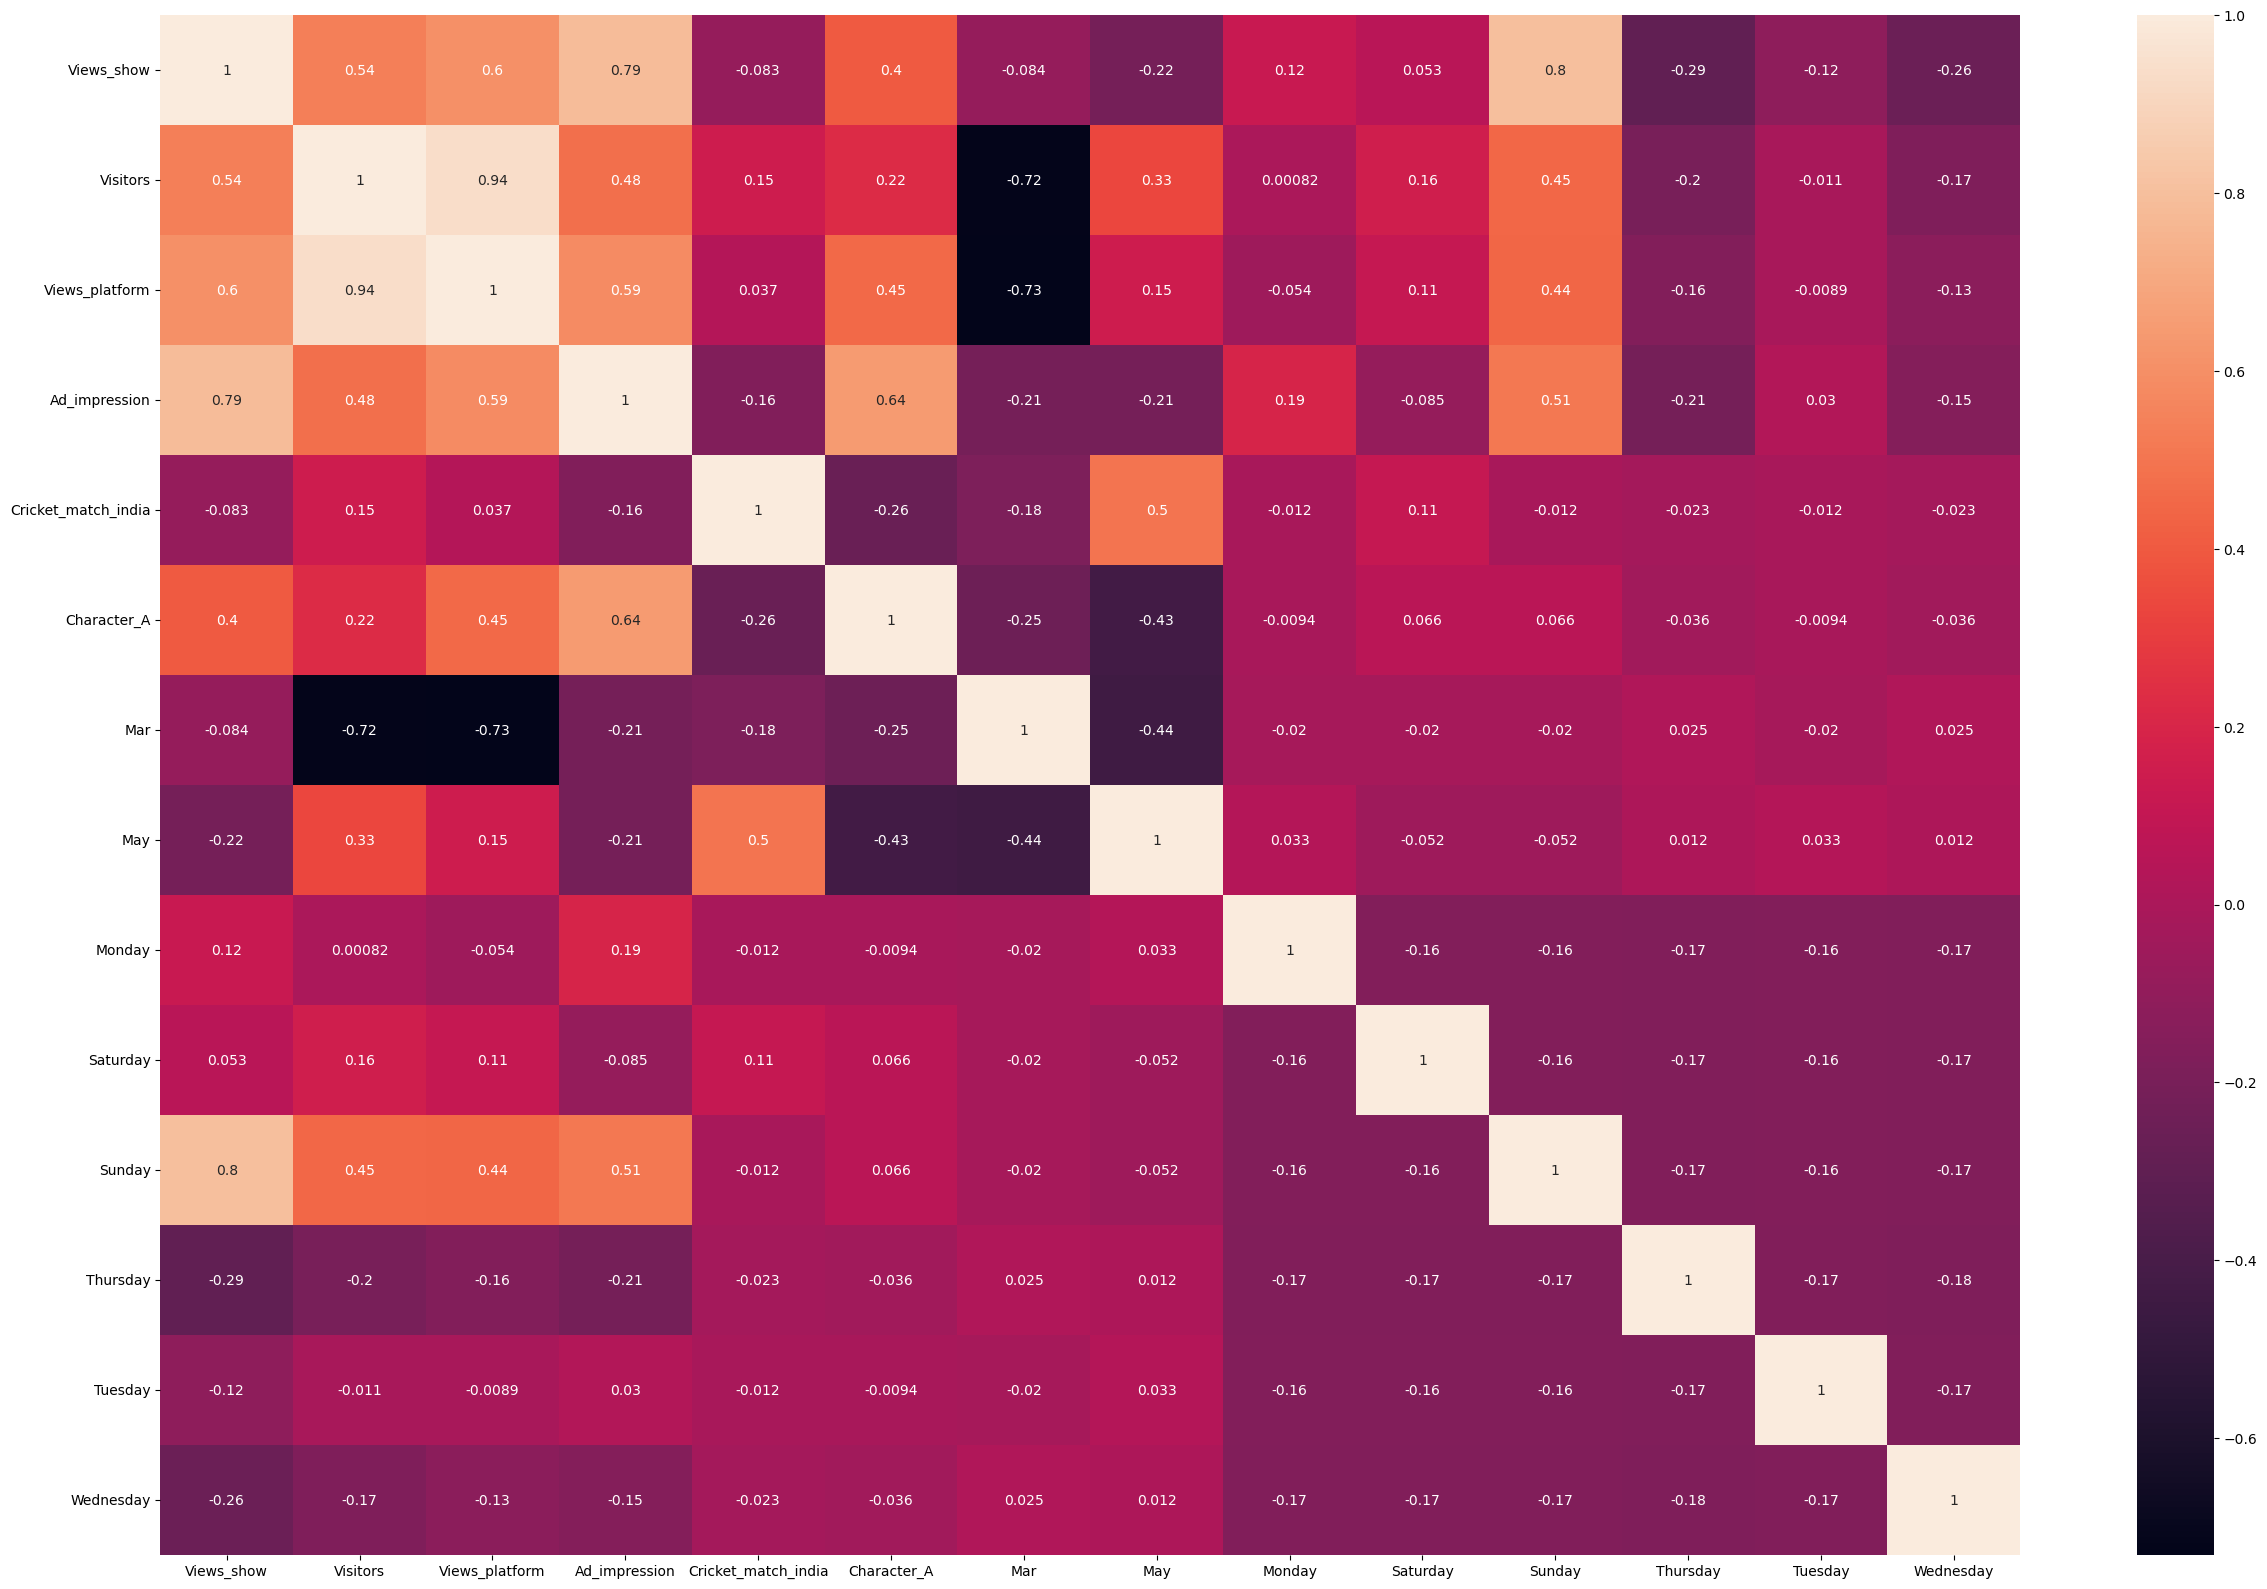

In [142]:
plt.figure(figsize=(30, 20))    
sns.heatmap(media.corr(),annot = True)
plt.show()

### Step 4: Splitting the data in training and test data set
#### We can skip this, because the objective is to find out the reasons of drop in viewership not create a prediction model

In [140]:
# Scaling the data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

num_vars = ['Views_show', 'Visitors', 'Views_platform', 'Ad_impression']

media[num_vars] = scaler.fit_transform(media[num_vars])



media.head()

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Mar,May,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0.123787,0.010985,0.011466,0.035372,0,0,1,0,0,0,0,0,0,1
1,0.139066,0.020409,0.000000,0.014844,0,0,1,0,0,0,0,1,0,0
2,0.164544,0.000000,0.025792,0.000000,0,0,1,0,0,0,0,0,0,0
3,0.209631,0.223199,0.119842,0.048345,1,0,1,0,0,1,0,0,0,0
4,0.523988,0.316041,0.255290,0.245426,0,0,1,0,0,0,1,0,0,0


In [141]:
media.describe()

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Mar,May,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,0.285596,0.411214,0.387039,0.305311,0.100000,0.375000,0.387500,0.237500,0.137500,0.137500,0.137500,0.150000,0.137500,0.150000
std,0.236125,0.210820,0.212093,0.211074,0.301893,0.487177,0.490253,0.428236,0.346547,0.346547,0.346547,0.359324,0.346547,0.359324
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.126249,0.275962,0.233014,0.139418,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.203147,0.411011,0.389856,0.265374,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.377313,0.519589,0.508199,0.439774,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Step 5: Building a linear model


In [144]:
### Step 5: Building a linear model

y_train = media.pop('Views_show')
X_train = media


In [145]:
# rfe

from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train, y_train)

rfe = RFE(lm, step=8)
rfe = rfe.fit(X_train, y_train)



In [146]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Visitors', True, 1),
 ('Views_platform', True, 1),
 ('Ad_impression', True, 1),
 ('Cricket_match_india', False, 2),
 ('Character_A', False, 2),
 ('Mar', False, 2),
 ('May', False, 2),
 ('Monday', True, 1),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 2),
 ('Tuesday', False, 2),
 ('Wednesday', False, 2)]

In [147]:
col = X_train.columns[rfe.support_]
col

Index(['Visitors', 'Views_platform', 'Ad_impression', 'Monday', 'Saturday',
       'Sunday'],
      dtype='object')

In [148]:
X_train.columns[~rfe.support_]

Index(['Cricket_match_india', 'Character_A', 'Mar', 'May', 'Thursday',
       'Tuesday', 'Wednesday'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics


In [152]:
#### Building model using statsmodel, for the detailed statistics

import statsmodels.api as sm

X_train_rfe = X_train[col]

X_train_rfe_sm = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train, X_train_rfe_sm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     141.5
Date:                Fri, 02 Aug 2024   Prob (F-statistic):           3.84e-38
Time:                        04:39:21   Log-Likelihood:                 103.91
No. Observations:                  80   AIC:                            -193.8
Df Residuals:                      73   BIC:                            -177.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0531      0.019      2.

In [153]:
# calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,Features,VIF
0,Visitors,43.319262
1,Views_platform,50.378322
2,Ad_impression,6.396399
3,Monday,1.587576
4,Saturday,1.369316
5,Sunday,1.892026


In [154]:
# Drop Views_platform

X_train_rfe_2 = X_train_rfe.drop('Views_platform', axis=1)

X_train_rfe_2_sm = sm.add_constant(X_train_rfe_2)

lm = sm.OLS(y_train, X_train_rfe_2_sm).fit()

print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     125.2
Date:                Fri, 02 Aug 2024   Prob (F-statistic):           1.18e-34
Time:                        04:40:47   Log-Likelihood:                 92.340
No. Observations:                  80   AIC:                            -172.7
Df Residuals:                      74   BIC:                            -158.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0369      0.022      1.717

In [155]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_rfe_2

vif['Features'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,Features,VIF
0,Visitors,4.411404
1,Ad_impression,4.657781
2,Monday,1.380156
3,Saturday,1.344297
4,Sunday,1.799299


### Step 6: Residual analysis of the train data

In [156]:
y_train_pred = lm.predict(X_train_rfe_2_sm)

In [157]:
res = y_train - y_train_pred

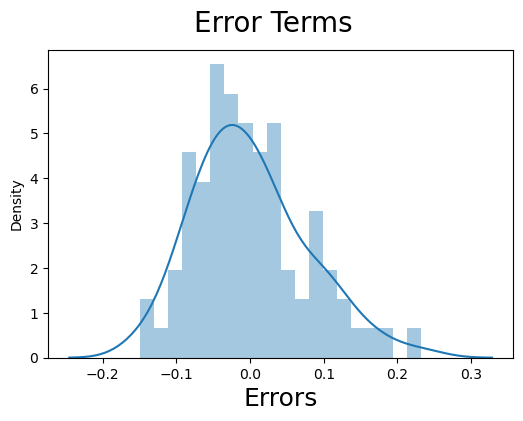

In [158]:
# Let's plot the histogram of the error terms

fig = plt.figure(figsize=(6, 4))
sns.distplot(res, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

In [159]:
# Evaluating the model

from sklearn.metrics import r2_score

r2_score(y_train, y_train_pred)

0.8942851561851607